# Análise de Sentimento de Notícias Financeiras

Para treinar o modelo, utilizou-se o seguinte conjunto de dados: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news


In [26]:
import pandas as pd

df = pd.read_csv('data/all-data.csv', names=["sentiment", "text"], encoding="utf-8", encoding_errors="replace")

df

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


# Pré-processamento

In [27]:
!pip install nltk gensim wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: c:\users\guisa\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Tokenize

In [29]:
doc_words = [] # tokenize

for doc in df['text']:
    tokens = word_tokenize(doc.lower())
    doc_words.append(tokens)

for i in range(10):
    print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['according', 'to', 'gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to']
doc_words[ 1 ] ['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no']
doc_words[ 2 ] ['the', 'international', 'electronic', 'industry', 'company', 'elcoteq', 'has', 'laid', 'off', 'tens']
doc_words[ 3 ] ['with', 'the', 'new', 'production', 'plant', 'the', 'company', 'would', 'increase', 'its']
doc_words[ 4 ] ['according', 'to', 'the', 'company', "'s", 'updated', 'strategy', 'for', 'the', 'years']
doc_words[ 5 ] ['financing', 'of', 'aspocomp', "'s", 'growth', 'aspocomp', 'is', 'aggressively', 'pursuing', 'its']
doc_words[ 6 ] ['for', 'the', 'last', 'quarter', 'of', '2010', ',', 'componenta', "'s", 'net']
doc_words[ 7 ] ['in', 'the', 'third', 'quarter', 'of', '2010', ',', 'net', 'sales', 'increased']
doc_words[ 8 ] ['operating', 'profit', 'rose', 'to', 'eur', '13.1', 'mn', 'from', 'eur', '8.7']
doc_words[ 9 ] ['operating', 'profit', 'totalled', 'eur', '21.1', 'mn', '

# Criando nosso Dicionário, 11K Words!

In [30]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{',': 0, '.': 1, 'according': 2, 'all': 3, 'although': 4, 'company': 5, 'gran': 6, 'growing': 7, 'has': 8, 'is': 9, 'move': 10, 'no': 11, 'plans': 12, 'production': 13, 'russia': 14, 'that': 15, 'the': 16, 'to': 17, 'where': 18, '100,000': 19, 'an': 20, 'and': 21, 'area': 22, 'companies': 23, 'computer': 24, 'develop': 25, 'host': 26, 'in': 27, 'less': 28, 'meters': 29, 'of': 30, 'order': 31, 'said': 32, 'square': 33, 'stages': 34, 'statement': 35, 'technologies': 36, 'technopolis': 37, 'telecommunications': 38, 'than': 39, 'working': 40, ';': 41, 'contracted': 42, 'contrary': 43, 'daily': 44, 'earlier': 45, 'elcoteq': 46, 'electronic': 47, 'employees': 48, 'facility': 49, 'from': 50, 'industry': 51, 'international': 52, 'its': 53, 'laid': 54, 'layoffs': 55, 'off': 56, 'office': 57, 'postimees': 58, 'ranks': 59, 'reported': 60, 'tallinn': 61, 'tens': 62, 'workers': 63, 'capacity': 64, 'demand': 65, 'expected': 66, 'improve': 67, 'increase': 68, 'materials': 69, 'meet': 70, 'new': 71, '

In [31]:
print(len(dictionary.token2id))

11695


## BOW de um documento

In [32]:
for i in range(5):
    print('doc_words[', i , ']',doc_words[i][0:10])
    print(dictionary.doc2bow(doc_words[i]))


doc_words[ 0 ] ['according', 'to', 'gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to']
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1)]
doc_words[ 1 ] ['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no']
[(0, 1), (1, 1), (11, 1), (12, 1), (16, 1), (17, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]
doc_words[ 2 ] ['the', 'international', 'electronic', 'industry', 'company', 'elcoteq', 'has', 'laid', 'off', 'tens']
[(0, 1), (1, 1), (5, 2), (8, 1), (16, 4), (17, 1), (30, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]
doc_words

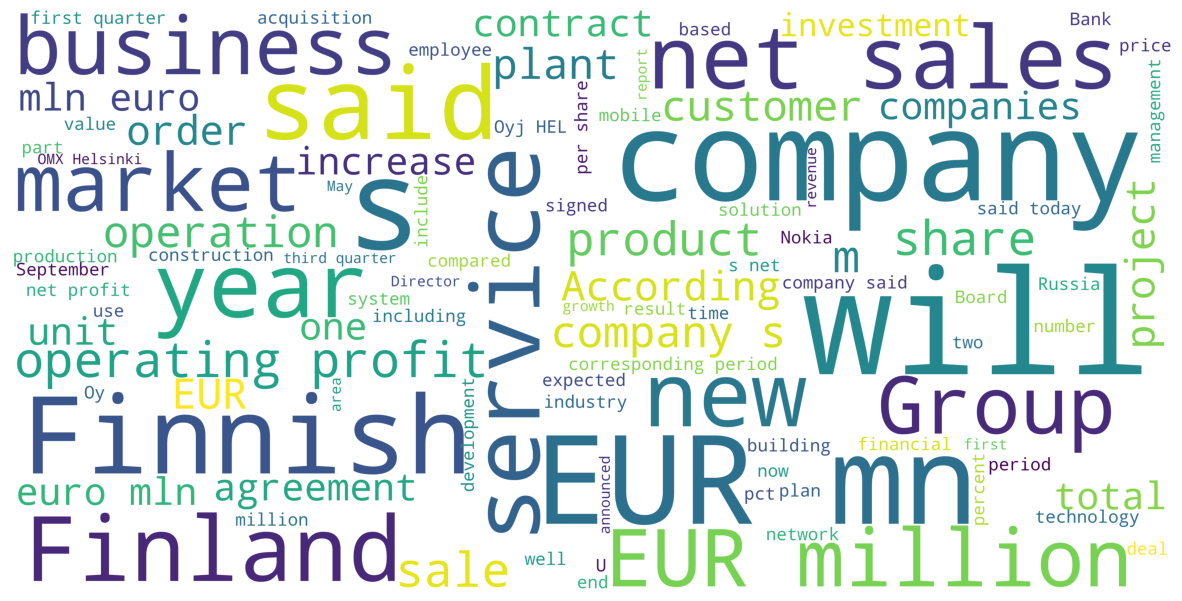

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_text = ''.join(df['text'])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", \
                      scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Revisando nosso dicionário

### Stop words

In [34]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
stop_words_port = stopwords.words("english")

doc_words = [] # tokenize

for doc in df['text']:
    tokens = word_tokenize(doc.lower())
    tokens_clean = [each for each in tokens if each not in stop_words_port]
    doc_words.append(tokens_clean)

for i in range(10):
    print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['according', 'gran', ',', 'company', 'plans', 'move', 'production', 'russia', ',', 'although']
doc_words[ 1 ] ['technopolis', 'plans', 'develop', 'stages', 'area', 'less', '100,000', 'square', 'meters', 'order']
doc_words[ 2 ] ['international', 'electronic', 'industry', 'company', 'elcoteq', 'laid', 'tens', 'employees', 'tallinn', 'facility']
doc_words[ 3 ] ['new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase']
doc_words[ 4 ] ['according', 'company', "'s", 'updated', 'strategy', 'years', '2009-2012', ',', 'basware', 'targets']
doc_words[ 5 ] ['financing', 'aspocomp', "'s", 'growth', 'aspocomp', 'aggressively', 'pursuing', 'growth', 'strategy', 'increasingly']
doc_words[ 6 ] ['last', 'quarter', '2010', ',', 'componenta', "'s", 'net', 'sales', 'doubled', 'eur131m']
doc_words[ 7 ] ['third', 'quarter', '2010', ',', 'net', 'sales', 'increased', '5.2', '%', 'eur']
doc_words[ 8 ] ['operating', 'profit', 'rose', 'eur', '13.1',

### Pontuação


In [36]:
import string
print(string.punctuation)
trash = [e for e in string.punctuation]

for e in ['http','https']:
    trash.append(e)

print(trash)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'http', 'https']


In [37]:
stop_words_port = stopwords.words("english")

doc_words = [] # tokenize

for doc in df['text']:
    tokens = word_tokenize(doc.lower())
    tokens_clean = [each for each in tokens if each not in stop_words_port]
    tokens_clean = [each for each in tokens_clean if each not in trash]
    doc_words.append(tokens_clean)

for i in range(10):
    print('doc_words[', i , ']',doc_words[i][0:10])

doc_words[ 0 ] ['according', 'gran', 'company', 'plans', 'move', 'production', 'russia', 'although', 'company', 'growing']
doc_words[ 1 ] ['technopolis', 'plans', 'develop', 'stages', 'area', 'less', '100,000', 'square', 'meters', 'order']
doc_words[ 2 ] ['international', 'electronic', 'industry', 'company', 'elcoteq', 'laid', 'tens', 'employees', 'tallinn', 'facility']
doc_words[ 3 ] ['new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase']
doc_words[ 4 ] ['according', 'company', "'s", 'updated', 'strategy', 'years', '2009-2012', 'basware', 'targets', 'long-term']
doc_words[ 5 ] ['financing', 'aspocomp', "'s", 'growth', 'aspocomp', 'aggressively', 'pursuing', 'growth', 'strategy', 'increasingly']
doc_words[ 6 ] ['last', 'quarter', '2010', 'componenta', "'s", 'net', 'sales', 'doubled', 'eur131m', 'eur76m']
doc_words[ 7 ] ['third', 'quarter', '2010', 'net', 'sales', 'increased', '5.2', 'eur', '205.5', 'mn']
doc_words[ 8 ] ['operating', 'p

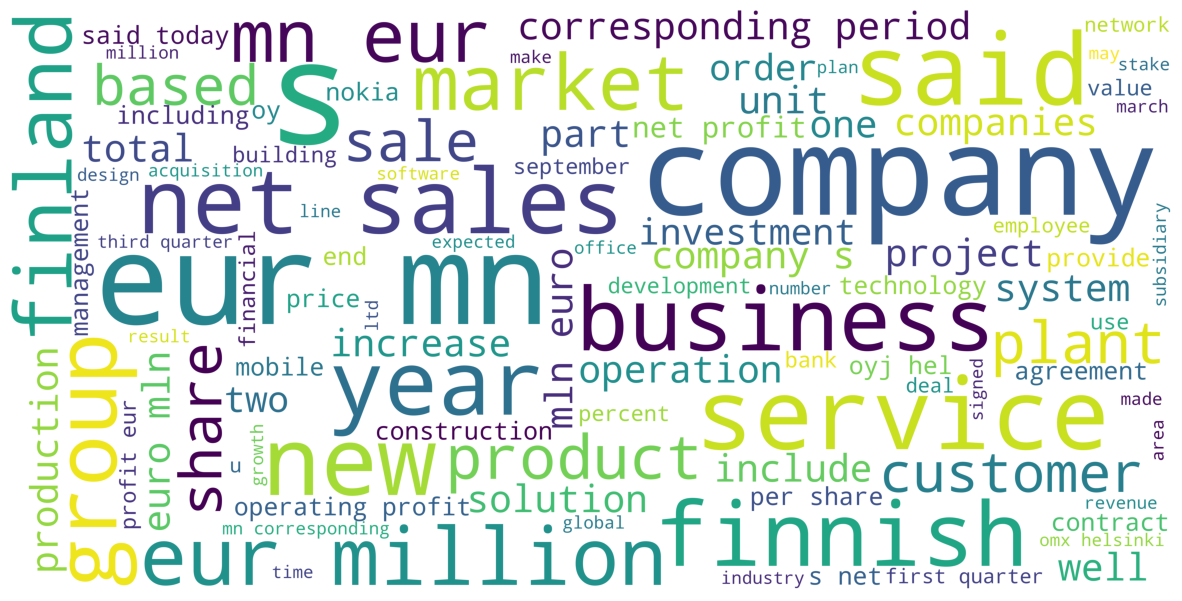

In [38]:
word_cloud_text = ''.join([' '.join(doc) for doc in doc_words])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", \
                      scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Stemming

In [39]:
nltk.download("rslp")

stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\guisa\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [40]:
stop_words_port = stopwords.words("english")

doc_words_before = doc_words
doc_words = [] # tokenize

for doc in df['text']:
    tokens = word_tokenize(doc.lower())
    tokens_clean = [each for each in tokens if each not in stop_words_port]
    tokens_clean = [each for each in tokens_clean if each not in trash]
    tokens_clean = [stemmer.stem(each) for each in tokens_clean]
    doc_words.append(tokens_clean)


for i in range(10):
    print('doc_words[', i , ']',doc_words[i][0:10])


doc_words[ 0 ] ['according', 'gran', 'company', 'pl', 'mov', 'production', 'russ', 'although', 'company', 'growing']
doc_words[ 1 ] ['technopolil', 'pl', 'develop', 'stag', 'are', 'les', '100,000', 'squ', 'met', 'ord']
doc_words[ 2 ] ['internat', 'electronic', 'industry', 'company', 'elcoteq', 'laid', 'tem', 'employe', 'tallinn', 'facility']
doc_words[ 3 ] ['new', 'production', 'plant', 'company', 'would', 'increas', 'capacity', 'meet', 'expected', 'increas']
doc_words[ 4 ] ['according', 'company', "'s", 'updated', 'strategy', 'ye', '2009-2012', 'basw', 'target', 'long-term']
doc_words[ 5 ] ['financing', 'aspocomp', "'s", 'growth', 'aspocomp', 'aggressively', 'pursuing', 'growth', 'strategy', 'increasingly']
doc_words[ 6 ] ['last', 'quart', '2010', 'component', "'s", 'net', 'sal', 'doubled', 'eur131m', 'eur76m']
doc_words[ 7 ] ['third', 'quart', '2010', 'net', 'sal', 'increased', '5.2', 'eur', '205.5', 'mn']
doc_words[ 8 ] ['operating', 'profit', 'ros', 'eur', '13.1', 'mn', 'eur', '8.7

## Criando nosso Novo Dicionário Clean, 10K!

In [41]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'according': 0, 'although': 1, 'company': 2, 'gran': 3, 'growing': 4, 'mov': 5, 'pl': 6, 'production': 7, 'russ': 8, '100,000': 9, 'are': 10, 'compani': 11, 'comput': 12, 'develop': 13, 'host': 14, 'les': 15, 'met': 16, 'ord': 17, 'said': 18, 'squ': 19, 'stag': 20, 'statement': 21, 'technologi': 22, 'technopolil': 23, 'telecommunicatiom': 24, 'working': 25, 'contracted': 26, 'contrary': 27, 'daily': 28, 'earli': 29, 'elcoteq': 30, 'electronic': 31, 'employe': 32, 'facility': 33, 'industry': 34, 'internat': 35, 'laid': 36, 'layoff': 37, 'offic': 38, 'postime': 39, 'rank': 40, 'reported': 41, 'tallinn': 42, 'tem': 43, 'work': 44, 'capacity': 45, 'demand': 46, 'expected': 47, 'improv': 48, 'increas': 49, 'mater': 50, 'meet': 51, 'new': 52, 'plant': 53, 'profitability': 54, 'raw': 55, 'therefor': 56, 'use': 57, 'would': 58, "'s": 59, '-20': 60, '-40': 61, '10': 62, '20': 63, '2009-2012': 64, 'basw': 65, 'growth': 66, 'long-term': 67, 'margin': 68, 'net': 69, 'operating': 70, 'profit': 71,

In [42]:
print(len(dictionary.token2id))

10477


### BOW de um documento

In [43]:
print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
    bow.append(dictionary.doc2bow(doc_words[i]))

for i in range(-3,3):
    print('doc_words[', i , ']',bow[i])
    print('\n')


{'according': 0, 'although': 1, 'company': 2, 'gran': 3, 'growing': 4, 'mov': 5, 'pl': 6, 'production': 7, 'russ': 8, '100,000': 9, 'are': 10, 'compani': 11, 'comput': 12, 'develop': 13, 'host': 14, 'les': 15, 'met': 16, 'ord': 17, 'said': 18, 'squ': 19, 'stag': 20, 'statement': 21, 'technologi': 22, 'technopolil': 23, 'telecommunicatiom': 24, 'working': 25, 'contracted': 26, 'contrary': 27, 'daily': 28, 'earli': 29, 'elcoteq': 30, 'electronic': 31, 'employe': 32, 'facility': 33, 'industry': 34, 'internat': 35, 'laid': 36, 'layoff': 37, 'offic': 38, 'postime': 39, 'rank': 40, 'reported': 41, 'tallinn': 42, 'tem': 43, 'work': 44, 'capacity': 45, 'demand': 46, 'expected': 47, 'improv': 48, 'increas': 49, 'mater': 50, 'meet': 51, 'new': 52, 'plant': 53, 'profitability': 54, 'raw': 55, 'therefor': 56, 'use': 57, 'would': 58, "'s": 59, '-20': 60, '-40': 61, '10': 62, '20': 63, '2009-2012': 64, 'basw': 65, 'growth': 66, 'long-term': 67, 'margin': 68, 'net': 69, 'operating': 70, 'profit': 71,

### Criando nosso 'Corpus' de Documentos

O 'Corpus' é uma base contendo todos os documentos.

In [45]:
corpus = [dictionary.doc2bow(doc) for doc in doc_words]

In [46]:
len(corpus) == len(doc_words)


True

### TF-IDF de um Documento

Uma representação que leva em conta a quantidade de têrmos na coleção (corpus).

$$ w_{i,j} = tf_{ij} \times log( \frac{N}{df_i} ) $$

Novamente veja a representação compactada.

In [47]:
tf_idf = gensim.models.TfidfModel(corpus)
# for doc in tf_idf[corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

In [49]:
# TF-IDF das noticias

print(dictionary.token2id)
print(len(dictionary.token2id))

bow = []

for i in range(0,100):
    bow.append(dictionary.doc2bow(doc_words[i]))

tfidf = []

for i in range(0,100):
    tfidf.append(tf_idf[bow[i]])

for i in range(-3,3):
    print('doc_words[', i , ']',bow[i])
    print('doc_words[', i , ']',tfidf[i])
    print('\n')


{'according': 0, 'although': 1, 'company': 2, 'gran': 3, 'growing': 4, 'mov': 5, 'pl': 6, 'production': 7, 'russ': 8, '100,000': 9, 'are': 10, 'compani': 11, 'comput': 12, 'develop': 13, 'host': 14, 'les': 15, 'met': 16, 'ord': 17, 'said': 18, 'squ': 19, 'stag': 20, 'statement': 21, 'technologi': 22, 'technopolil': 23, 'telecommunicatiom': 24, 'working': 25, 'contracted': 26, 'contrary': 27, 'daily': 28, 'earli': 29, 'elcoteq': 30, 'electronic': 31, 'employe': 32, 'facility': 33, 'industry': 34, 'internat': 35, 'laid': 36, 'layoff': 37, 'offic': 38, 'postime': 39, 'rank': 40, 'reported': 41, 'tallinn': 42, 'tem': 43, 'work': 44, 'capacity': 45, 'demand': 46, 'expected': 47, 'improv': 48, 'increas': 49, 'mater': 50, 'meet': 51, 'new': 52, 'plant': 53, 'profitability': 54, 'raw': 55, 'therefor': 56, 'use': 57, 'would': 58, "'s": 59, '-20': 60, '-40': 61, '10': 62, '20': 63, '2009-2012': 64, 'basw': 65, 'growth': 66, 'long-term': 67, 'margin': 68, 'net': 69, 'operating': 70, 'profit': 71,

# Word Embedding, **`word2vec`**

In [50]:
import gensim
from gensim.models import Word2Vec

In [51]:
model_CBOW = Word2Vec(doc_words, min_count=1, workers=3, vector_size= 50, window =5, sg = 0) # sg = 0 means CBOW
model_SGRAM = Word2Vec(doc_words, min_count=1, workers=3, vector_size= 50,window =5, sg = 1)

In [52]:
model_CBOW.wv.index_to_key

['eur',
 "'s",
 'company',
 'said',
 'mn',
 'finnish',
 'sal',
 '``',
 'million',
 'sh',
 'profit',
 'net',
 'serv',
 'finland',
 'new',
 'group',
 'ye',
 'operating',
 '2009',
 'mln',
 'market',
 '2008',
 'period',
 'busines',
 '2007',
 'quart',
 'oyj',
 '2010',
 'als',
 'first',
 'product',
 '2006',
 'contract',
 'helsink',
 'los',
 'nok',
 'operatiom',
 'today',
 'compared',
 'plant',
 'financ',
 'total',
 'custom',
 'bank',
 'syst',
 'ord',
 'mak',
 'unit',
 'mobil',
 'investment',
 'production',
 'per',
 'corporation',
 'agreement',
 'according',
 'percent',
 'project',
 'compani',
 'hel',
 'technology',
 'provid',
 'corresponding',
 'solutiom',
 'result',
 'capit',
 'pric',
 'increased',
 'construction',
 'increas',
 '--',
 'includ',
 'well',
 '2005',
 'ros',
 'stock',
 'valu',
 'part',
 'pct',
 'network',
 'pap',
 'us',
 'board',
 'oy',
 'are',
 'building',
 'report',
 'one',
 'would',
 'omx',
 'development',
 'manufactur',
 'management',
 'deal',
 'offic',
 'industry',
 'dat',


In [53]:
len(model_CBOW.wv.index_to_key)

10477

## Doc embedding

Cada documento é representado por uma média das *word vectors* de seus termos.

In [54]:
doc_embed = []

for doc in doc_words:
    d = np.zeros(50)
    nr_words = 0
    for word in doc:
        if word in model_CBOW.wv.index_to_key:
            d = d + model_CBOW.wv[word]
            nr_words = nr_words + 1
    if nr_words != 0: # avoid all words not in the vocabulary :-()
        d = d / nr_words
    doc_embed.append(d)

print(len(doc_embed))
print(len(doc_embed[0]))

4846
50


## Cada documento é um vetor de dimensão 100

In [55]:
for i in range(-2,2):
    print('doc_words[', i , ']',doc_words[i][0:10])
    print('doc_embed[', i , ']',doc_embed[i])

doc_words[ -2 ] ['net', 'sal', 'pap', 'segment', 'decreased', 'eur', '221.6', 'mn', 'second', 'quart']
doc_embed[ -2 ] [ 0.00689757  0.18051988 -0.01880285  0.1325414  -0.48232006 -0.85595032
  0.89606624  1.1233419  -0.89178385 -0.39731227  0.11851787 -0.56623272
  0.48490877  0.28099405 -0.12904822 -0.28547737  0.34967389  0.11438803
 -1.26181291 -1.12825722 -0.20572576  0.36307011  0.91054462 -0.23384407
  0.10765285 -0.07546005 -0.07695635 -0.19862017 -0.6662447   0.42014427
  0.02119084 -0.61334908  0.02579525 -0.3133885  -0.63084935  0.27412973
  0.3999388   0.21428421  0.23303593 -0.53766635  0.30652248  0.13491064
 -0.01032984  0.38231064  1.73237957  0.03726176  0.15558228  0.19589105
  0.04906954  0.47769045]
doc_words[ -1 ] ['sal', 'finland', 'decreased', '10.5', 'january', 'sal', 'outsid', 'finland', 'dropped', '17']
doc_embed[ -1 ] [ 0.00809275  0.03921695 -0.03633774 -0.04425891 -0.34990892 -0.72570561
  0.61873825  0.90945033 -0.77546177 -0.32419628  0.11835771 -0.500863

## **Machine Learning**: Aplicando um modelo de classifição

Com essa representação podemos, por exemplo, aplicar um modelo de **Machine Learning** para fazer a classificação de Tweets. Aqui empregamos uma Árvore de Decisão para *predizer* se um Tweet é do Estadão.

In [56]:
df

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [60]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X = doc_embed
y = df.sentiment.replace({'neutral':0, 'negative':-1, 'positive':+1})


In [63]:
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None,
                             random_state=seed)

# Treinamento (Treina o Modelo)
clf.fit(X_train, y_train)

# Predição (Emprega o Modelo)
y_pred = clf.predict(X_test)

print(y_pred)

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[0 0 1 ... 0 1 0]
[[ 38  82  61]
 [ 68 578 218]
 [ 52 228 129]]
              precision    recall  f1-score   support

          -1       0.24      0.21      0.22       181
           0       0.65      0.67      0.66       864
           1       0.32      0.32      0.32       409

    accuracy                           0.51      1454
   macro avg       0.40      0.40      0.40      1454
weighted avg       0.51      0.51      0.51      1454

